# Ställ in colab

Ladda ner från github


In [0]:
def restart_runtime():
    import os
    os.kill(os.getpid(), 9)

!git clone https://github.com/abbsimoga/ReinforcementLearning

!pip install -e /content/ReinforcementLearning/Basic_Tic_Tac_Toe_Environment/
!pip install -e /content/ReinforcementLearning/Market_Environment/
!pip install -e /content/ReinforcementLearning/Agents/

%cd /content/ReinforcementLearning
!mkdir models
%cd /content

restart_runtime()

Cloning into 'ReinforcementLearning'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 2745 (delta 5), reused 24 (delta 3), pack-reused 2716
Receiving objects: 100% (2745/2745), 10.56 MiB | 2.12 MiB/s, done.
Resolving deltas: 100% (1291/1291), done.
Obtaining file:///content/ReinforcementLearning/Basic_Tic_Tac_Toe_Environment
  Running setup.py develop for tictoc
Obtaining file:///content/ReinforcementLearning/Market_Environment
  Running setup.py develop for MarketEnvironment
Obtaining file:///content/ReinforcementLearning/Agents
  Running setup.py develop for Agents
/content/ReinforcementLearning


Open Ai Gym Basics
===

### Open Ai Gym kommer med redan klara **environments**
Ett sådant environment är Taxi problemet som du läst om i min github
Här nedanför är en presentation av **environmentet** utan användning av Q-Learning

In [0]:
import gym
env = gym.make('Taxi-v3')

observation = env.reset()
reward = 0
steps = 0

while reward != 20:
    observation, reward, done, info = env.step(env.action_space.sample())
    steps+=1

print(steps)
env.render()

3225
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


Implementering av Q-Learning

In [0]:
import gym
import numpy as np

env = gym.make("Taxi-v3")

Q = np.zeros([env.observation_space.n, env.action_space.n])

gamma = 0.1
alpha = 0.1
epsilon = 0.1
epsilon_decay = 0.99

total_epochs = 0
episodes = 5000

for episode in range(episodes):
    epochs = 0
    reward = 0
    epsilon = epsilon * epsilon_decay

    state = env.reset()
    
    while reward != 20:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        next_state, reward, done, info = env.step(action)
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        state = next_state 
        epochs += 1
    total_epochs += epochs
    
print("Average timesteps taken: {}".format(total_epochs/episodes))

Average timesteps taken: 78.0754


Cartpole task och bandit problem fick jag tyvärr inte att fungera i colab

:(

# Tic Tac Toe Environment

Att skapa environmentet var det enkla. Att faktiskt implementera q-learning är lite svårare, skapa ett q-table med index (antal states) djupet (antalet actions) som i taxi environment. Men den delen kommer jag lämmna till market environment, då jag har dåligt med tid.

In [0]:
import gym
import tictoc
import random

env = gym.make('TicTac-v0')

while not env.done:
    env.step(random.randint(0,8))
    print(env.done, env.reward, env.turn)


[2, 0, 0]
[0, 0, 0]
[0, 0, 0]
False 0 1
[2, 0, 1]
[0, 0, 0]
[0, 0, 0]
False 0 2
[2, 0, 1]
[0, 2, 0]
[0, 0, 0]
False 0 3
invalid step
[2, 0, 1]
[0, 2, 0]
[0, 0, 0]
False 0 3
invalid step
[2, 0, 1]
[0, 2, 0]
[0, 0, 0]
False 0 3
[2, 0, 1]
[1, 2, 0]
[0, 0, 0]
False 0 4
[2, 0, 1]
[1, 2, 0]
[0, 0, 2]
False 0 5
invalid step
[2, 0, 1]
[1, 2, 0]
[0, 0, 2]
False 0 5
invalid step
[2, 0, 1]
[1, 2, 0]
[0, 0, 2]
False 0 5
[2, 0, 1]
[1, 2, 1]
[0, 0, 2]
False 0 6
invalid step
[2, 0, 1]
[1, 2, 1]
[0, 0, 2]
False 0 6
invalid step
[2, 0, 1]
[1, 2, 1]
[0, 0, 2]
False 0 6
invalid step
[2, 0, 1]
[1, 2, 1]
[0, 0, 2]
False 0 6
invalid step
[2, 0, 1]
[1, 2, 1]
[0, 0, 2]
False 0 6
invalid step
[2, 0, 1]
[1, 2, 1]
[0, 0, 2]
False 0 6
invalid step
[2, 0, 1]
[1, 2, 1]
[0, 0, 2]
False 0 6
invalid step
[2, 0, 1]
[1, 2, 1]
[0, 0, 2]
False 0 6
invalid step
[2, 0, 1]
[1, 2, 1]
[0, 0, 2]
False 0 6
[2, 2, 1]
[1, 2, 1]
[0, 0, 2]
False 0 7
invalid step
[2, 2, 1]
[1, 2, 1]
[0, 0, 2]
False 0 7
invalid step
[2, 2, 1]
[1, 2, 1

# Testa Skapat Market Environments


### Ladda in pandas data frame

Hämta data till market environment

In [0]:
!python /content/ReinforcementLearning/DataMarket/Data.py --stockAmount=1 --startDate="2016-01-01"

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
import gym
import os
import pandas as pd
import random

def load_dataset(name):
    return pd.read_csv("/content/ReinforcementLearning/DataMarket/data/"+name, index_col="Date")

dataFrameName = random.choice(os.listdir("/content/ReinforcementLearning/DataMarket/data/"))
# dataFrameName = "AAP"+".csv"

dataFrame = load_dataset(dataFrameName)
dataFrame.index = range(pd.Index(dataFrame['Open']).size)

dataframe = dataFrame.drop(dataFrame.tail(1000).index,inplace=True)

print(dataFrame)

          High         Low        Open       Close     Volume   Adj Close
0   148.320007  145.399994  148.050003  146.820007  3277200.0  130.480072
1   147.500000  145.610001  146.820007  147.460007  2688100.0  131.048843
2   145.759995  143.419998  145.589996  144.490005  2997100.0  128.409363
3   143.130005  140.630005  142.520004  140.970001  3553500.0  125.281113
4   142.500000  140.220001  141.360001  140.490005  2664000.0  124.854546
..         ...         ...         ...         ...        ...         ...
70  169.000000  167.880005  169.000000  168.160004  1213400.0  150.524826
71  169.000000  168.199997  168.320007  168.779999  1417000.0  151.079788
72  169.869995  168.389999  168.470001  169.550003  1146600.0  151.769073
73  170.770004  169.070007  169.919998  169.649994  1849100.0  151.858566
74  170.449997  168.619995  170.139999  168.940002  1439700.0  151.223007

[75 rows x 6 columns]


### Market-v0

Skapa environment och kör igenom alla action spaces och rendrera för att kolla att allt funkar

Nu har vi gjort mer än halva mitt förra projekt med en kvart av koden och som enklare kan förbättras/utvecklas

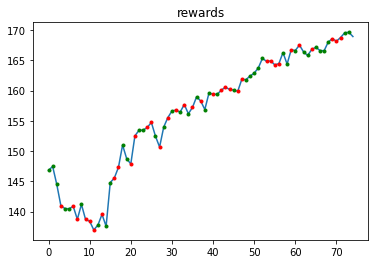

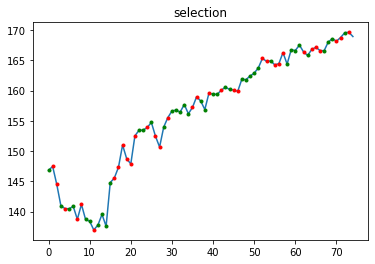

In [0]:
import gym
import MarketEnvironments
from Agents import Agent0

env = gym.make('Market-v0', df = dataFrame)
agent = Agent0(2)

done = False

while not done:
    _, _, done, _ = env.step(agent.act())

env.render(env.reward_plot, "rewards")
env.render(env.selection_plot, "selection")

För att implementera Q-Learning på enklast sätt med q-table (orealistiskt men enkelt och snabbt) Vi kan lägga vi till detta, och har nu uppgraderat den artificiella inteligensen till att memorisera ett dataset genom trial and error med Q-learning

reward: -12 random: 52 bäst lämpade: 22


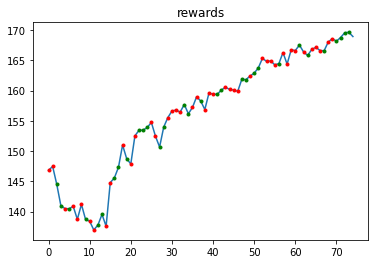

reward: 26 random: 50 bäst lämpade: 24


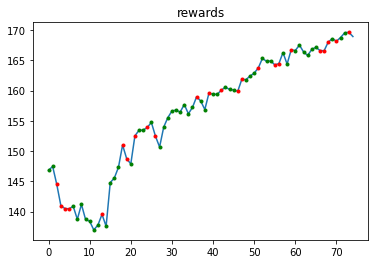

reward: 34 random: 37 bäst lämpade: 37


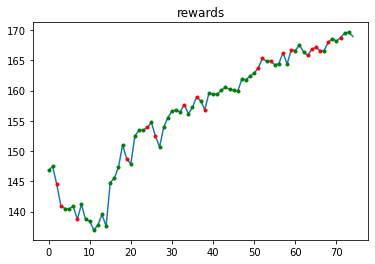

reward: 38 random: 29 bäst lämpade: 45


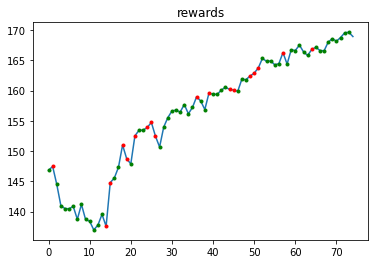

reward: 58 random: 18 bäst lämpade: 56


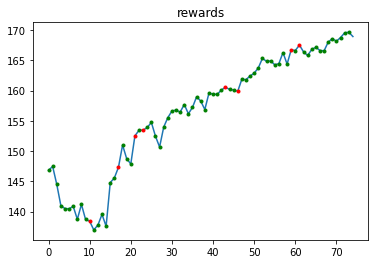

reward: 58 random: 10 bäst lämpade: 64


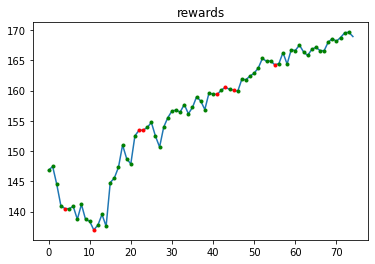

reward: 64 random: 14 bäst lämpade: 60


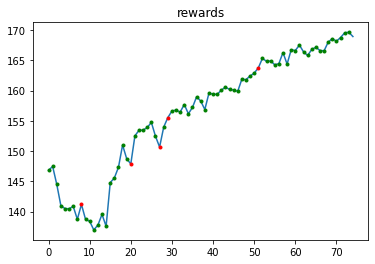

reward: 60 random: 14 bäst lämpade: 60


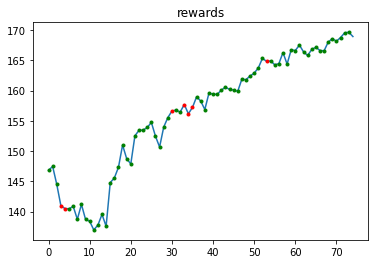

reward: 68 random: 13 bäst lämpade: 61


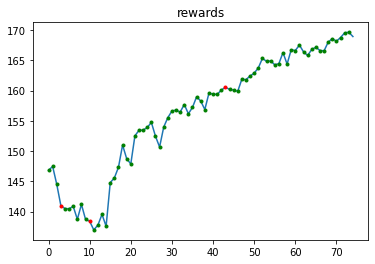

reward: 68 random: 5 bäst lämpade: 69


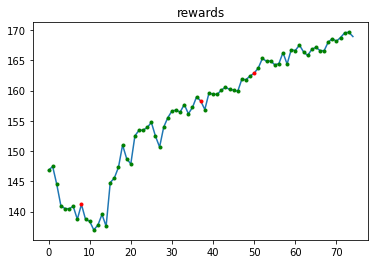

reward: 68 random: 5 bäst lämpade: 69


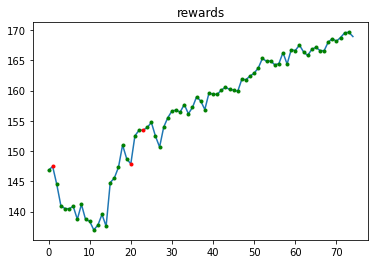

reward: 74 random: 2 bäst lämpade: 72


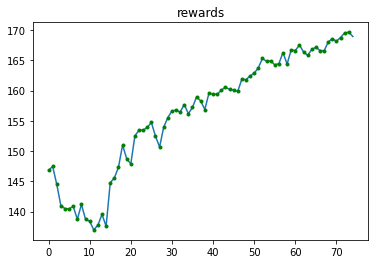

reward: 72 random: 2 bäst lämpade: 72


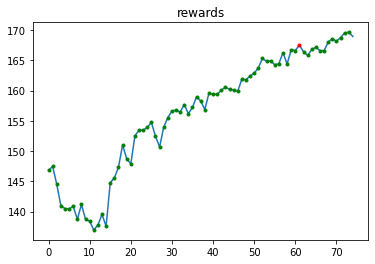

reward: 72 random: 1 bäst lämpade: 73


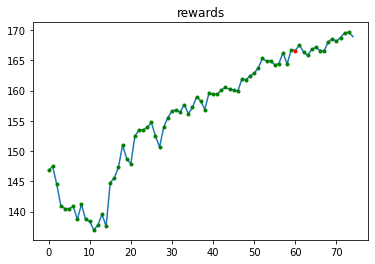

reward: 72 random: 2 bäst lämpade: 72


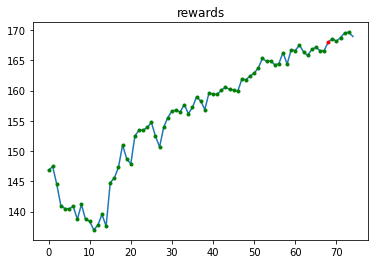

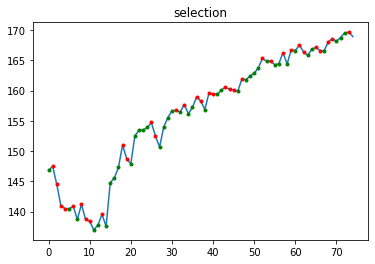

[ 1. -1.]
[-1.  1.]
[-1.  1.]
[-1.  1.]
[-1.  1.]
[ 1. -1.]
[-1.  1.]
[ 1. -1.]
[-1.  1.]
[0. 1.]
[-1.  1.]
[ 1. -1.]
[1. 0.]
[-1.  1.]
[ 1. -1.]
[ 1. -1.]
[1. 0.]
[ 1. -1.]
[-1.  1.]
[-1.  1.]
[ 1. -1.]
[ 1. -1.]
[ 1. -1.]
[ 1. -1.]
[ 1. -1.]
[-1.  1.]
[-1.  1.]
[ 1. -1.]
[1. 0.]
[ 1. -1.]
[ 1. -1.]
[-1.  1.]
[ 1. -1.]
[-1.  1.]
[ 1. -1.]
[ 1. -1.]
[-1.  1.]
[-1.  1.]
[ 1. -1.]
[-1.  1.]
[-1.  1.]
[ 1. -1.]
[ 1. -1.]
[-1.  1.]
[-1.  1.]
[-1.  1.]
[ 1. -1.]
[-1.  1.]
[1. 0.]
[ 1. -1.]
[ 1. -1.]
[ 1. -1.]
[-1.  1.]
[ 1. -1.]
[-1.  1.]
[ 1. -1.]
[ 1. -1.]
[-1.  1.]
[ 1. -1.]
[-1.  1.]
[ 1. -1.]
[-1.  1.]
[-1.  1.]
[ 1. -1.]
[ 1. -1.]
[-1.  1.]
[-1.  1.]
[ 1. -1.]
[ 1. -1.]
[-1.  1.]
[ 1. -1.]
[ 1. -1.]
[1. 0.]
[-1.  1.]


In [0]:
import gym
import MarketEnvironments
from Agents import Agent1

env = gym.make('Market-v0', df = dataFrame)
agent = Agent1(env.max_index, 2)

episodes = 15

for episode in range(episodes):
    done = False

    agent.new_episode()
    state = env.reset()
    
    while not done:
        action = agent.act(state)
        next_state, reward, done, state_value = env.step(action)
        agent.update_q_table(reward, state, action)
        state = next_state

    print("reward:", agent.total_reward, "random:", agent.random_action, "bäst lämpade:", agent.max_min_action)
    env.render(env.reward_plot, "rewards")

env.render(env.selection_plot, "selection")
for q in agent.q_table:
    print(q)

Använder vi oss utav DQN Deep Q-learning Network kan vi träna fram en flexiblare modell

reward: 12 random: 74 mlp predict: 0
reward: 2 random: 74 mlp predict: 0
reward: 4 random: 74 mlp predict: 0
reward: 4 random: 74 mlp predict: 0
reward: 10 random: 72 mlp predict: 2
reward: 0 random: 71 mlp predict: 3
reward: -8 random: 71 mlp predict: 3
reward: 2 random: 73 mlp predict: 1
reward: -4 random: 73 mlp predict: 1
reward: 12 random: 71 mlp predict: 3
reward: 20 random: 69 mlp predict: 5
reward: 4 random: 73 mlp predict: 1
reward: 2 random: 71 mlp predict: 3
reward: 12 random: 70 mlp predict: 4
reward: 0 random: 66 mlp predict: 8
reward: 12 random: 66 mlp predict: 8
reward: 2 random: 68 mlp predict: 6
reward: -4 random: 71 mlp predict: 3
reward: -2 random: 70 mlp predict: 4
reward: 10 random: 67 mlp predict: 7
reward: -10 random: 68 mlp predict: 6
reward: -4 random: 68 mlp predict: 6
reward: 4 random: 67 mlp predict: 7
reward: 2 random: 64 mlp predict: 10
reward: -4 random: 64 mlp predict: 10
reward: -10 random: 68 mlp predict: 6
reward: -6 random: 67 mlp predict: 7
reward: 

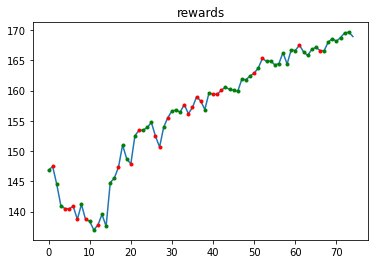

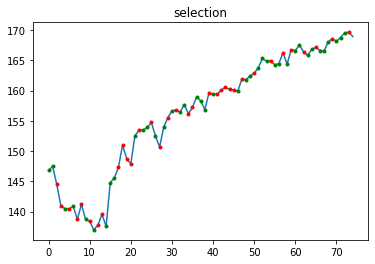

INFO:tensorflow:Assets written to: /content/ReinforcementLearning/models/Model-v0/assets


In [0]:
import gym
import MarketEnvironments
from Agents import Agent2

env = gym.make('Market-v0', df = dataFrame)
agent = Agent2(2, dataFrame, 5)

episodes = 200
batch_size = 32

# agent.load_model("Model-v0")

for episode in range(episodes):
    done = False

    agent.new_episode()
    state = env.reset()

    while not done:
        action = agent.act(state)
        next_state, reward, done, state_value = env.step(action)
        agent.total_reward += reward
        agent.memory.append((agent.get_state(agent.data, state, 5), action, reward, agent.get_state(agent.data, next_state, 5), done))
        state = next_state

    print("reward:", agent.total_reward, "random:", agent.random_action, "mlp predict:", agent.mlp_action)

    if len(agent.memory) > batch_size:
		    agent.exp_replay(batch_size)

env.render(env.reward_plot, "rewards")
env.render(env.selection_plot, "selection")
agent.save_model(agent.model, "Model-v0")

### Market-v1

Market-v1 använder sig av ett komplexare rewardsystem och agenten kan nu hålla i aktsien

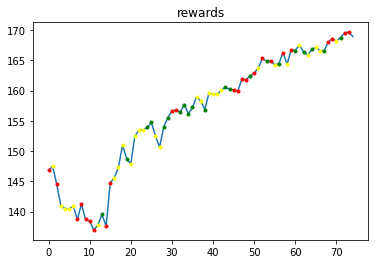

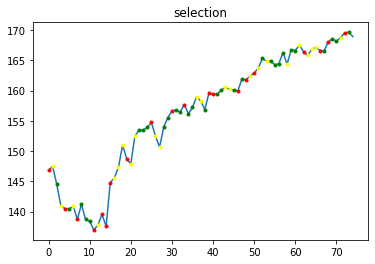

In [0]:
import gym
import MarketEnvironments
from Agents import Agent0

env = gym.make('Market-v1', df = dataFrame)
agent = Agent0(3)

done = False

while not done:
    _, _, done, _ = env.step(agent.act())

env.render(env.reward_plot, "rewards")
env.render(env.selection_plot, "selection")

reward: -56.51214050292978 random: 58 bäst lämpade: 16


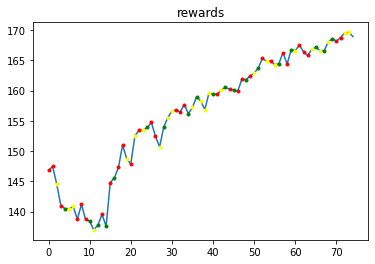

reward: 2.438962554931639 random: 44 bäst lämpade: 30


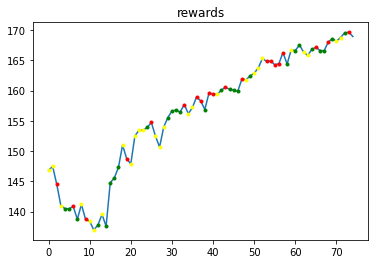

reward: 10.08878883361825 random: 39 bäst lämpade: 35


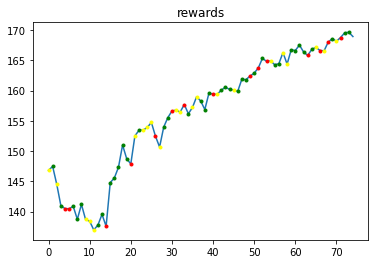

reward: 45.73670951843243 random: 33 bäst lämpade: 41


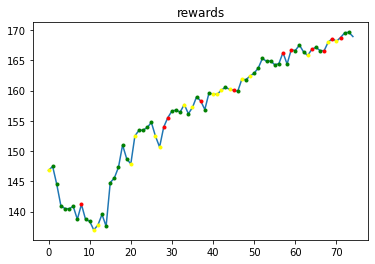

reward: 45.647313842773414 random: 24 bäst lämpade: 50


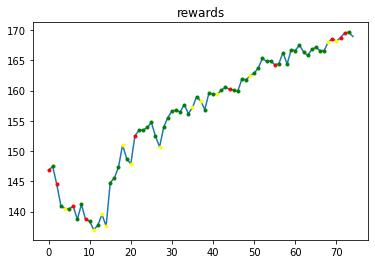

reward: 60.60614555358887 random: 18 bäst lämpade: 56


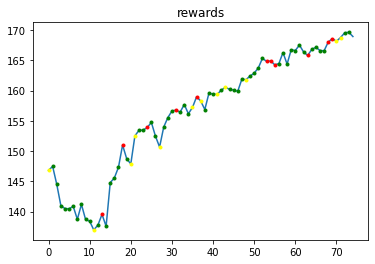

reward: 73.18791511535638 random: 16 bäst lämpade: 58


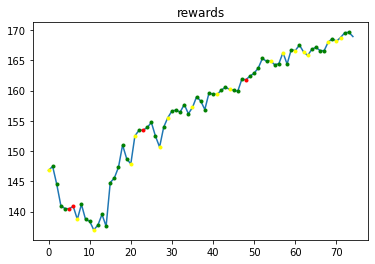

reward: 69.20559371948235 random: 12 bäst lämpade: 62


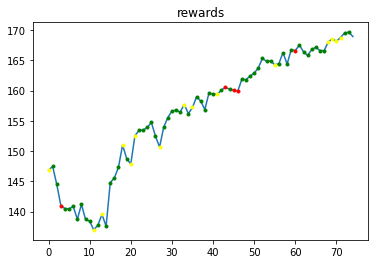

reward: 83.06115341186509 random: 10 bäst lämpade: 64


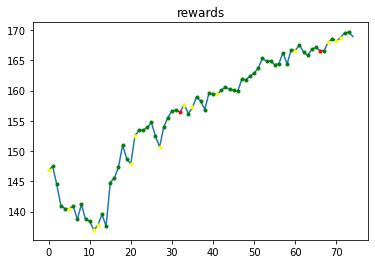

reward: 86.28752182006819 random: 5 bäst lämpade: 69


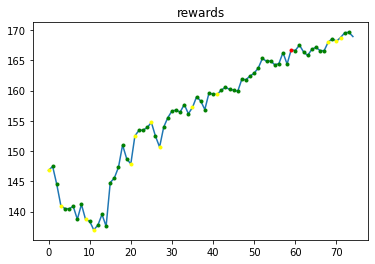

reward: 90.83430839538563 random: 2 bäst lämpade: 72


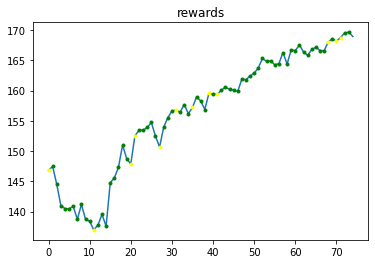

reward: 89.44375900268544 random: 7 bäst lämpade: 67


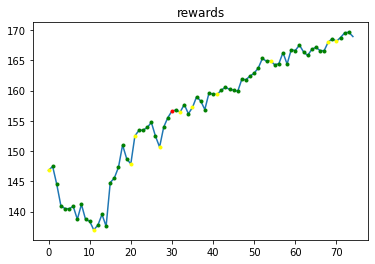

reward: 73.00942123413081 random: 6 bäst lämpade: 68


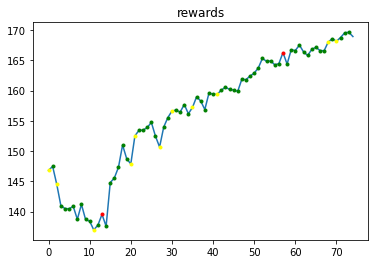

reward: 91.42451446533192 random: 3 bäst lämpade: 71


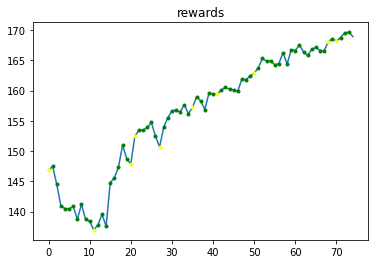

reward: 91.47006507873525 random: 2 bäst lämpade: 72


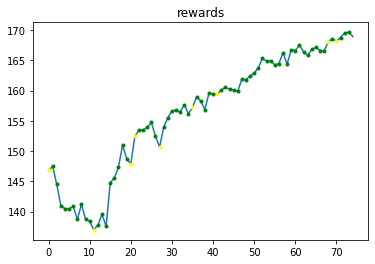

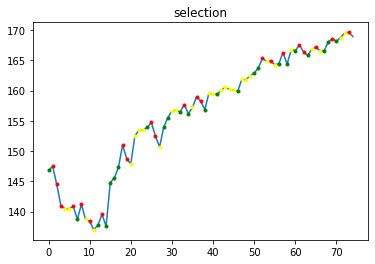

[ 0.54589874  0.         -1.37409943]
[-6.67730247 -2.97000122  2.23270119]
[-7.76245857 -3.52000427  2.79755424]
[-1.66484146 -0.47999573 -0.22485428]
[-0.76244759 -0.02999878 -0.67245125]
[ 0.09768776  0.3999939  -1.10229393]
[-4.98429878 -2.13999939  1.43569939]
[ 4.2263829   2.45999146 -3.15359146]
[-5.68588043 -2.48999023  1.78409027]
[-1.29345612 -0.30000305 -0.39344696]
[ 0.         -1.42999268  0.73804268]
[0.         0.79998779 0.        ]
[2.83121956 1.76000977 0.        ]
[-4.59759392 -1.94999695  1.25239693]
[13.73213287  7.20999146 -7.89784149]
[ 0.81610855  0.         -1.49390427]
[2.81225853 0.         0.        ]
[ 6.62338531  0.         -4.41659271]
[-5.29500854 -2.27000427  1.51500427]
[-2.4636512  -0.86000061  0.11635063]
[ 0.          4.65000916 -5.38935913]
[ 0.          0.91999817 -1.68259819]
[-0.70720245  0.02999878 -0.79719879]
[ 0.09263535  0.42999268 -1.19734268]
[ 0.91052322  0.8400116  -1.60951157]
[-5.35371712 -2.29000854  1.51630852]
[-4.32224754 -1.77999

In [0]:
import gym
import MarketEnvironments
from Agents import Agent1

env = gym.make('Market-v1', df = dataFrame)
agent = Agent1(env.max_index, 3)

episodes = 15

for episode in range(episodes):
    done = False

    agent.new_episode()
    state = env.reset()
    
    while not done:
        action = agent.act(state)
        next_state, reward, done, state_value = env.step(action)
        agent.update_q_table(reward, state, action)
        state = next_state

    print("reward:", agent.total_reward, "random:", agent.random_action, "bäst lämpade:", agent.max_min_action)
    env.render(env.reward_plot, "rewards")

env.render(env.selection_plot, "selection")
for q in agent.q_table:
    print(q)

reward: -54.26615005493154 random: 74 mlp predict: 0
reward: -12.737801513671764 random: 74 mlp predict: 0
reward: -27.913353881836137 random: 74 mlp predict: 0
reward: -16.989815979003957 random: 71 mlp predict: 3
reward: -26.11463500976571 random: 71 mlp predict: 3
reward: -27.758815460205096 random: 72 mlp predict: 2
reward: -66.88792236328116 random: 74 mlp predict: 0
reward: -34.14359909057606 random: 70 mlp predict: 4
reward: -39.453936920166065 random: 72 mlp predict: 2
reward: -8.031711730957088 random: 68 mlp predict: 6
reward: -38.29306480407729 random: 69 mlp predict: 5
reward: -34.27951484680182 random: 72 mlp predict: 2
reward: -21.28428062438962 random: 68 mlp predict: 6
reward: -5.831469039917078 random: 69 mlp predict: 5
reward: 4.746163177490095 random: 72 mlp predict: 2
reward: -20.841010589599556 random: 70 mlp predict: 4
reward: -20.31745330810541 random: 68 mlp predict: 6
reward: -19.699259948730532 random: 69 mlp predict: 5
reward: -35.12364105224624 random: 68 ml

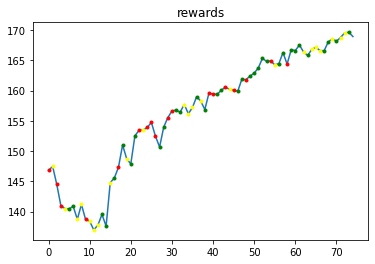

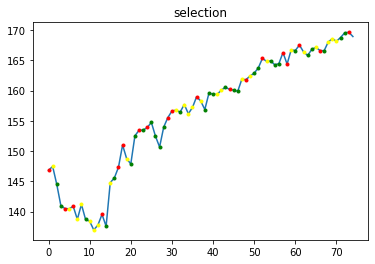

In [0]:
import gym
import MarketEnvironments
from Agents import Agent2

env = gym.make('Market-v1', df = dataFrame)
agent = Agent2(3, dataFrame, 5)

episodes = 200
batch_size = 32

# agent.load_model("Model-v1")

for episode in range(episodes):
    done = False

    agent.new_episode()
    state = env.reset()

    while not done:
        action = agent.act(state)
        next_state, reward, done, state_value = env.step(action)
        agent.total_reward += reward
        agent.memory.append((agent.get_state(agent.data, state, 5), action, reward, agent.get_state(agent.data, next_state, 5), done))
        state = next_state

    print("reward:", agent.total_reward, "random:", agent.random_action, "mlp predict:", agent.mlp_action)

    if len(agent.memory) > batch_size:
		    agent.exp_replay(batch_size)

env.render(env.reward_plot, "rewards")
env.render(env.selection_plot, "selection")
agent.save_model(agent.model, "Model-v1")

### Market-v2

Market-v2 state är utvecklad från v1 ger nu all data de senaste x dagarna som state

reward: -4.175946426391574 random: 74 mlp predict: 0
reward: -40.46068778991708 random: 74 mlp predict: 0
reward: -36.89026428222658 random: 72 mlp predict: 2
reward: 1.2089277648925247 random: 73 mlp predict: 1
reward: -2.804400177001928 random: 72 mlp predict: 2
reward: -33.61030456542973 random: 73 mlp predict: 1
reward: -31.47063201904297 random: 73 mlp predict: 1
reward: -23.43080146789551 random: 70 mlp predict: 4
reward: 1.9547070312499968 random: 71 mlp predict: 3
reward: -17.146905517578045 random: 68 mlp predict: 6
reward: -22.273563690185487 random: 72 mlp predict: 2
reward: -35.75271781921395 random: 69 mlp predict: 5
reward: -28.94931434631334 random: 67 mlp predict: 7
reward: -69.3844898223877 random: 71 mlp predict: 3
reward: 5.098336410522295 random: 69 mlp predict: 5
reward: 2.480750885009647 random: 72 mlp predict: 2
reward: 16.763930969238142 random: 68 mlp predict: 6
reward: -11.381458129882951 random: 71 mlp predict: 3
reward: -13.44521606445304 random: 67 mlp pred

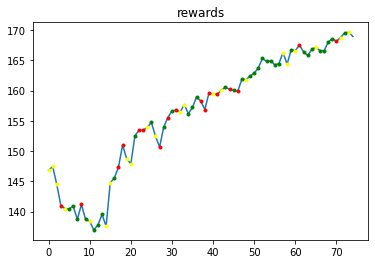

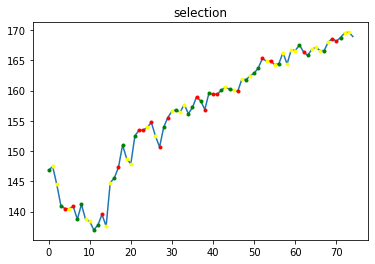

In [0]:
import gym
import MarketEnvironments
from Agents import Agent3
env = gym.make('Market-v2', df = dataFrame, data_amount = 5)
agent = Agent3(3, dataFrame, 5)

episodes = 200
batch_size = 32

# agent.load_model("Model-v2")

for episode in range(episodes):
    done = False

    agent.new_episode()
    state = env.reset()

    while not done:
        action = agent.act(state)
        next_state, reward, done = env.step(action)
        agent.total_reward += reward
        agent.memory.append((state, action, reward, next_state, done))
        state = next_state

    print("reward:", agent.total_reward, "random:", agent.random_action, "mlp predict:", agent.mlp_action)

    if len(agent.memory) > batch_size:
		    agent.exp_replay(batch_size)

env.render(env.reward_plot, "rewards")
env.render(env.selection_plot, "selection")
agent.save_model(agent.model, "Model-v2")